# Team Project with Sonal.all Dataset

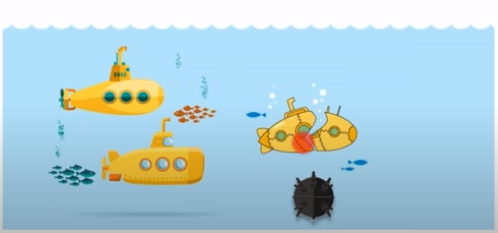

PROBLEM DESCRIPTION:

The goal is to model a prediction to decide between mines and rocks based on sonar signals data.

The file “sonar.mines” contains 111 patterns obtained by bouncing sonar signals off a metal cylinder at various angles and under various conditions. The file “sonar.rocks” contains 97 patterns obtained from rocks under similar conditions. The transmitted sonar signal is a frequency-modulated chirp, rising in frequency. The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock.

Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period of time. The integration aperture for higher frequencies occur later in time, since these frequencies are transmitted later during the chirp.

The label associated with each record contains the letter “R” if the object is a rock and “M” if it is a mine (metal cylinder). The numbers in the labels are in increasing order of aspect angle, but they do not encode the angle directly.

## Import Libarary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
df = pd.read_csv("sonar.all-data.csv")

In [3]:
df.columns

Index(['Freq_1', 'Freq_2', 'Freq_3', 'Freq_4', 'Freq_5', 'Freq_6', 'Freq_7',
       'Freq_8', 'Freq_9', 'Freq_10', 'Freq_11', 'Freq_12', 'Freq_13',
       'Freq_14', 'Freq_15', 'Freq_16', 'Freq_17', 'Freq_18', 'Freq_19',
       'Freq_20', 'Freq_21', 'Freq_22', 'Freq_23', 'Freq_24', 'Freq_25',
       'Freq_26', 'Freq_27', 'Freq_28', 'Freq_29', 'Freq_30', 'Freq_31',
       'Freq_32', 'Freq_33', 'Freq_34', 'Freq_35', 'Freq_36', 'Freq_37',
       'Freq_38', 'Freq_39', 'Freq_40', 'Freq_41', 'Freq_42', 'Freq_43',
       'Freq_44', 'Freq_45', 'Freq_46', 'Freq_47', 'Freq_48', 'Freq_49',
       'Freq_50', 'Freq_51', 'Freq_52', 'Freq_53', 'Freq_54', 'Freq_55',
       'Freq_56', 'Freq_57', 'Freq_58', 'Freq_59', 'Freq_60', 'Label'],
      dtype='object')

In [4]:
# Since there is no column name so lets add that
# column 0 to 59 so they will be named as Feature 0,..,Feature 59
# and lets name target column as Class

# First lets make a lost of column name
new_column_names = []
for i in range(60):
    new_column_names.append(f"Feature {i}")

new_column_names.append("Class")

In [5]:
# Now lets assign it by simply using this
df.columns = new_column_names
df

,Feature 0,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 51,Feature 52,Feature 53,Feature 54,Feature 55,Feature 56,Feature 57,Feature 58,Feature 59,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [6]:
df.shape

(208, 61)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Feature 0   208 non-null    float64
 1   Feature 1   208 non-null    float64
 2   Feature 2   208 non-null    float64
 3   Feature 3   208 non-null    float64
 4   Feature 4   208 non-null    float64
 5   Feature 5   208 non-null    float64
 6   Feature 6   208 non-null    float64
 7   Feature 7   208 non-null    float64
 8   Feature 8   208 non-null    float64
 9   Feature 9   208 non-null    float64
 10  Feature 10  208 non-null    float64
 11  Feature 11  208 non-null    float64
 12  Feature 12  208 non-null    float64
 13  Feature 13  208 non-null    float64
 14  Feature 14  208 non-null    float64
 15  Feature 15  208 non-null    float64
 16  Feature 16  208 non-null    float64
 17  Feature 17  208 non-null    float64
 18  Feature 18  208 non-null    float64
 19  Feature 19  208 non-null    f

In [8]:
df.isnull().sum()

Feature 0     0
Feature 1     0
Feature 2     0
Feature 3     0
Feature 4     0
             ..
Feature 56    0
Feature 57    0
Feature 58    0
Feature 59    0
Class         0
Length: 61, dtype: int64

In [9]:
#check missing values in data
#The information shows there is not any missing data.
df.isnull().sum().sum()

0

## EDA

In [10]:
df["Class"].value_counts()

M    111
R     97
Name: Class, dtype: int64

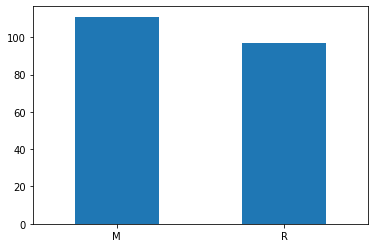

In [11]:
# Plot the histogram of the Mines and Rocks labels
df['Class'].value_counts().plot.bar(rot=0)
plt.show()

In [12]:
# Replacing M with 0 and R with 1
train = df.replace({'Class': {'M': 0, 
                                'R': 1}})

In [13]:
corr = train.corr()
corr_class = corr['Class']
# changing all values to postive and sorting and getting top 5 columns
corr_class.abs().sort_values(ascending=False)[:6]

Class         1.000000
Feature 10    0.432855
Feature 11    0.392245
Feature 48    0.351312
Feature 9     0.341142
Feature 44    0.339406
Name: Class, dtype: float64

In [14]:
# Lets make a new dataframe with these columns

new_df = train[['Class','Feature 10','Feature 11','Feature 48','Feature 9', 'Feature 44']]
new_df

,Class,Feature 10,Feature 11,Feature 48,Feature 9,Feature 44
0,1,0.1609,0.1582,0.0383,0.2111,0.2641
1,1,0.4918,0.6552,0.0409,0.2872,0.0621
2,1,0.6333,0.7060,0.0130,0.6194,0.2111
3,1,0.0881,0.1992,0.0681,0.1264,0.4295
4,1,0.4152,0.3952,0.0230,0.4459,0.0692
...,...,...,...,...,...,...
203,0,0.3108,0.2933,0.0858,0.2684,0.0902
204,0,0.3085,0.3425,0.0647,0.2154,0.0954
205,0,0.2716,0.2374,0.0535,0.2529,0.0910
206,0,0.2898,0.2812,0.0489,0.2354,0.1319


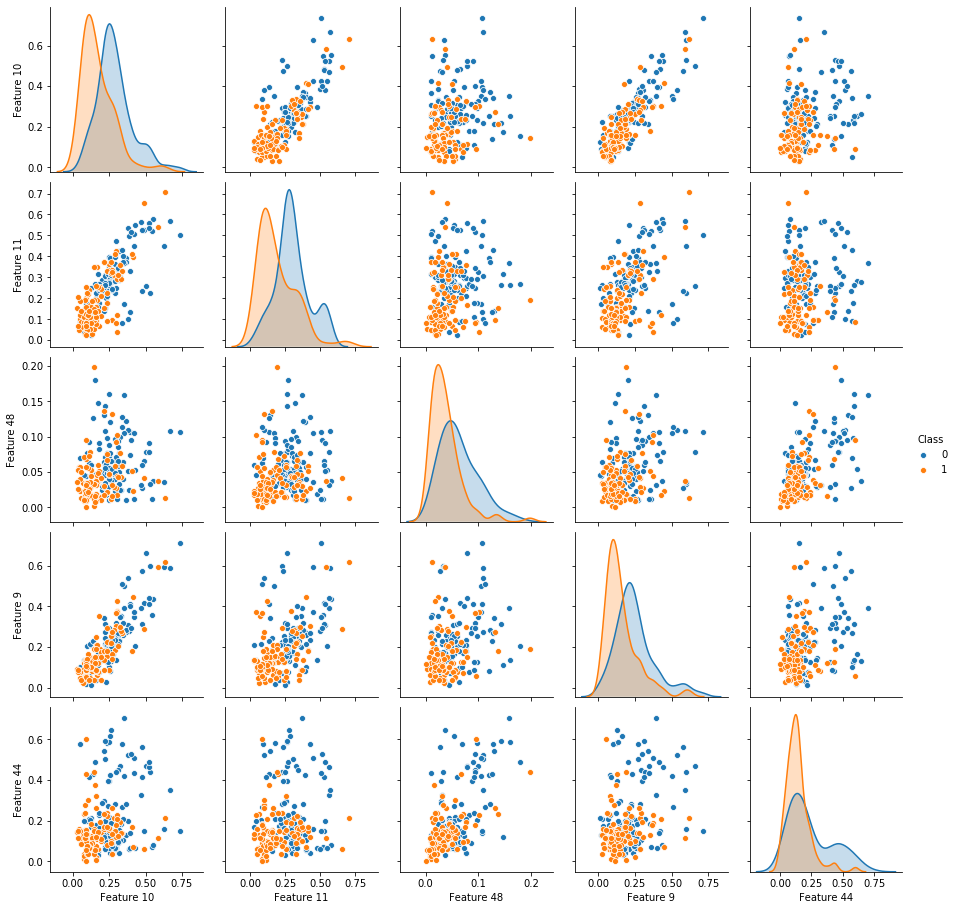

In [15]:
sns.pairplot(new_df,hue="Class")

## Detect Depend and UnDependent Variable

In [16]:
x = new_df.drop("Class",axis=1)
y = new_df['Class']

In [17]:
y.value_counts()

0    111
1     97
Name: Class, dtype: int64

## Split Test | Train Data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

This stratify parameter makes a split so that the proportion of values in thesample produced will be the same as the proportion of values provided to parameter stratify.For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [19]:
# splitting the dataset into train and test dataset with 4:1 ratio (80%-20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 42,stratify=y)

# Use Pipeline 
##  Scaling

### Standartization

In [20]:
from sklearn.preprocessing import StandardScaler
s_scaler=StandardScaler()
s_scaler.fit(x_train)
s_scaled_X_train=s_scaler.transform(x_train)
s_scaled_X_test=s_scaler.transform(x_test)

### Normalizer

In [21]:
from sklearn.preprocessing import Normalizer
n_scaler=Normalizer()
n_scaler.fit(x_train)
n_scaled_X_train=n_scaler.transform(x_train)
n_scaled_X_test=n_scaler.transform(x_test)

### MinMax Scaler

In [22]:
from sklearn.preprocessing import MinMaxScaler
mm_scaler=MinMaxScaler()
mm_scaler.fit(x_train)
mm_scaled_X_train=mm_scaler.transform(x_train)
mm_scaled_X_test=mm_scaler.transform(x_test)

### MaxAbsScaler

In [23]:
from sklearn.preprocessing import MaxAbsScaler
ma_scaler=MaxAbsScaler()
ma_scaler.fit(x_train)
ma_scaled_X_train=ma_scaler.transform(x_train)
ma_scaled_X_test=ma_scaler.transform(x_test)

### Power Transformer

In [24]:
from sklearn.preprocessing import PowerTransformer
pt_scaler=PowerTransformer()
pt_scaler.fit(x_train)
pt_scaled_X_train=pt_scaler.transform(x_train)
pt_scaled_X_test=pt_scaler.transform(x_test)

### Robust Scaler

In [25]:
from sklearn.preprocessing import RobustScaler
r_scaler=RobustScaler()
r_scaler.fit(x_train)
r_scaled_X_train=r_scaler.transform(x_train)
r_scaled_X_test=r_scaler.transform(x_test)

### Quantile Transformer

In [26]:
from sklearn.preprocessing import QuantileTransformer
qt_scaler=QuantileTransformer()
qt_scaler.fit(x_train)
qt_scaled_X_train=qt_scaler.transform(x_train)
qt_scaled_X_test=qt_scaler.transform(x_test)

## Modelling

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

# Create instance of model
lreg = LogisticRegression()
# Pass training data into model
lreg.fit(s_scaled_X_train, y_train)
y_pred_lreg = lreg.predict(s_scaled_X_test)
lreg_f1 = f1_score(y_test, y_pred_lreg)
lreg_recall = recall_score(y_test, y_pred_lreg)
lreg_auc = roc_auc_score(y_test, y_pred_lreg)

In [30]:
# Scoring our model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score, precision_score, recall_score

# Confusion Matrix
print('Logistic Regression')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_lreg))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_lreg))


# Accuracy of our model
print('--'*50)
logreg_accuracy = round(accuracy_score(y_test, y_pred_lreg) * 100,8)
print('Accuracy = ', logreg_accuracy,'%')

Logistic Regression


Confusion Matrix
[[18  4]
 [ 6 14]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.78      0.70      0.74        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42

----------------------------------------------------------------------------------------------------
Accuracy =  76.19047619 %


### KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
# Create instance of model
knn_model=KNeighborsClassifier(n_neighbors=3)
# Pass training data into model
knn_model.fit(s_scaled_X_train, y_train)
y_pred_knn=knn_model.predict(s_scaled_X_test)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_auc = roc_auc_score(y_test, y_pred_knn)

In [32]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_knn})

,Y_Test,Y_Pred
96,1,1
22,1,0
6,1,0
148,0,0
194,0,0
184,0,0
203,0,0
77,1,1
98,0,0
99,0,0


In [33]:
# Confusion Matrix
print('KNN Model')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_knn))


# Accuracy of our model
print('--'*50)
KNN_accuracy = round(accuracy_score(y_test, y_pred_knn) * 100,8)
print('Accuracy = ', KNN_accuracy,'%')

KNN Model


Confusion Matrix
[[21  1]
 [ 6 14]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42

----------------------------------------------------------------------------------------------------
Accuracy =  83.33333333 %


### Elbow Method for Choosing Reasonable K Values

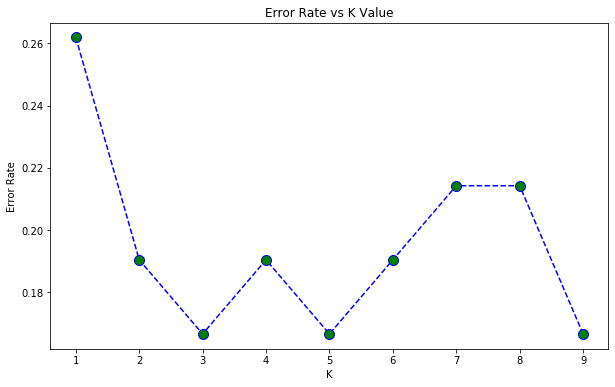

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# in knn we need to select a value of nearest neighbour, for now lets use a for loop. If accuarcy
# is better than other models then we would search for optimal parameter

error_rate = []

for i in range (1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(s_scaled_X_train, y_train)
    pred_i = knn.predict(s_scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plot error rate
plt.figure(figsize = (10,6))
plt.plot(range(1,10), error_rate, color = 'blue', linestyle = '--', marker = 'o', 
        markerfacecolor = 'green', markersize = 10)

plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [35]:
pd.Series(error_rate).diff()

0         NaN
1   -0.071429
2   -0.023810
3    0.023810
4   -0.023810
5    0.023810
6    0.023810
7    0.000000
8   -0.047619
dtype: float64

In [36]:
# now using above data to train with n_neighbors having least error rate

n_value = 0
min_error = float('inf')
for idx,error in enumerate(error_rate):
    if min_error>error:
        min_error=error
        n_value=idx+2

knn = KNeighborsClassifier(n_neighbors = n_value)
# Fit new KNN on training data
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [37]:
df_diff = pd.DataFrame(abs(pd.Series(error_rate).diff())).rename(index= lambda x : x + 1)
df_diff

,0
1,NaN
2,0.071429
3,0.023810
4,0.023810
5,0.023810
6,0.023810
7,0.023810
8,0.000000
9,0.047619


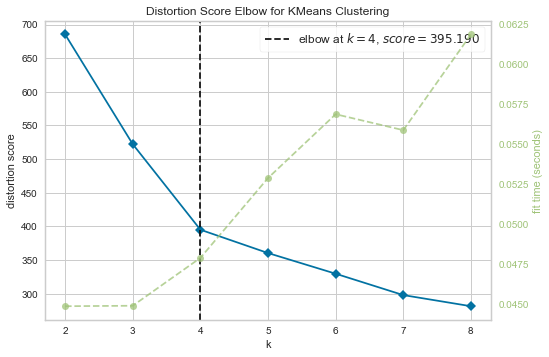

In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state= 42)
visualizer = KElbowVisualizer(model, k = (2, 9))
visualizer.fit(x)
visualizer.show()

### Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier
# Create instance of model
dt_model= DecisionTreeClassifier(criterion='gini', min_samples_split=2)
# Pass training data into model
dt_model.fit(s_scaled_X_train, y_train)
y_pred_dt=dt_model.predict(s_scaled_X_test)
dt_f1 = f1_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_auc = roc_auc_score(y_test, y_pred_dt)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_dt})

# Confusion Matrix
print('Decision Tree')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_dt))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_dt))


# Accuracy of our model
print('--'*50)
dt_accuracy = round(accuracy_score(y_test, y_pred_dt) * 100,8)
print('Accuracy = ', dt_accuracy,'%')

Decision Tree


Confusion Matrix
[[18  4]
 [ 9 11]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.67      0.82      0.73        22
           1       0.73      0.55      0.63        20

    accuracy                           0.69        42
   macro avg       0.70      0.68      0.68        42
weighted avg       0.70      0.69      0.68        42

----------------------------------------------------------------------------------------------------
Accuracy =  69.04761905 %


### Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
# Create instance of model
rf_model= RandomForestClassifier(random_state= 42, n_estimators=100)
# Pass training data into model
rf_model.fit(mm_scaled_X_train, y_train)
y_pred_rf=rf_model.predict(mm_scaled_X_test)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_rf)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_rf})

# Confusion Matrix
print('Random Forest')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_rf))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_rf))


# Accuracy of our model
print('--'*50)
rf_accuracy = round(accuracy_score(y_test, y_pred_rf) * 100,8)
print('Accuracy = ', rf_accuracy,'%')



Random Forest


Confusion Matrix
[[17  5]
 [ 7 13]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.72      0.65      0.68        20

    accuracy                           0.71        42
   macro avg       0.72      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42

----------------------------------------------------------------------------------------------------
Accuracy =  71.42857143 %


### SVM

In [41]:
from sklearn.svm import SVC, SVR
# Create instance of model
svm_model= SVC(random_state=42)
# Pass training data into model
svm_model.fit(mm_scaled_X_train, y_train)
y_pred_svm=svm_model.predict(mm_scaled_X_test)
svm_f1 = f1_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_auc = roc_auc_score(y_test, y_pred_svm)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_svm})

# Confusion Matrix
print('SVM')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_svm))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_svm))


# Accuracy of our model
print('--'*50)
svm_accuracy = round(accuracy_score(y_test, y_pred_svm) * 100,8)
print('Accuracy = ', svm_accuracy,'%')

SVM


Confusion Matrix
[[20  2]
 [ 7 13]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.87      0.65      0.74        20

    accuracy                           0.79        42
   macro avg       0.80      0.78      0.78        42
weighted avg       0.80      0.79      0.78        42

----------------------------------------------------------------------------------------------------
Accuracy =  78.57142857 %


### ADA Boosting

In [42]:
from sklearn.ensemble import AdaBoostClassifier
# Create instance of model
ada_model= AdaBoostClassifier(random_state= 42, n_estimators=50)
# Pass training data into model
ada_model.fit(r_scaled_X_train, y_train)
y_pred_ada=ada_model.predict(r_scaled_X_test)
ada_f1 = f1_score(y_test, y_pred_ada)
ada_recall = recall_score(y_test, y_pred_ada)
ada_auc = roc_auc_score(y_test, y_pred_ada)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_ada})

# Confusion Matrix
print('Ada Boosting')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_ada))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_ada))


# Accuracy of our model
print('--'*50)
ada_accuracy = round(accuracy_score(y_test, y_pred_ada) * 100,8)
print('Accuracy = ', ada_accuracy,'%')


Ada Boosting


Confusion Matrix
[[16  6]
 [ 6 14]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.73      0.73      0.73        22
           1       0.70      0.70      0.70        20

    accuracy                           0.71        42
   macro avg       0.71      0.71      0.71        42
weighted avg       0.71      0.71      0.71        42

----------------------------------------------------------------------------------------------------
Accuracy =  71.42857143 %


### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
# Create instance of model
gb_model= GradientBoostingClassifier(random_state= 42)
# Pass training data into model
gb_model.fit(r_scaled_X_train, y_train)
y_pred_gb=gb_model.predict(r_scaled_X_test)
gb_f1 = f1_score(y_test, y_pred_gb)
gb_recall = recall_score(y_test, y_pred_gb)
gb_auc = roc_auc_score(y_test, y_pred_gb)
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_gb})

# Confusion Matrix
print('Gradient Boosting')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_gb))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_gb))


# Accuracy of our model
print('--'*50)
gb_accuracy = round(accuracy_score(y_test, y_pred_gb) * 100,8)
print('Accuracy = ', gb_accuracy,'%')

Gradient Boosting


Confusion Matrix
[[17  5]
 [ 6 14]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.74      0.70      0.72        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42

----------------------------------------------------------------------------------------------------
Accuracy =  73.80952381 %


### XG Boosting

In [44]:
!pip install --upgrade pip

In [45]:
!pip install xgboost

In [46]:
from xgboost import XGBClassifier
# Create instance of model
xgb_model= XGBClassifier(random_state= 42)
# Pass training data into model
xgb_model.fit(r_scaled_X_train, y_train)
y_pred_xgb=xgb_model.predict(r_scaled_X_test)
xgb_f1 = f1_score(y_test, y_pred_xgb)
xgb_recall = recall_score(y_test, y_pred_xgb)
xgb_auc = roc_auc_score(y_test, y_pred_xgb)   
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred_xgb})

# Confusion Matrix
print('Extreme Gradient Boosting')
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred_xgb))
print('--'*50)

# Classification Report
print('Classification Report')
print(classification_report(y_test,y_pred_xgb))


# Accuracy of our model
print('--'*50)
xgb_accuracy = round(accuracy_score(y_test, y_pred_xgb) * 100,8)
print('Accuracy = ',xgb_accuracy,'%')

[12:33:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Extreme Gradient Boosting


Confusion Matrix
[[17  5]
 [ 6 14]]
----------------------------------------------------------------------------------------------------
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.77      0.76        22
           1       0.74      0.70      0.72        20

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42

----------------------------------------------------------------------------------------------------
Accuracy =  73.80952381 %


## Compare Result and Choose 3 Best Score Models

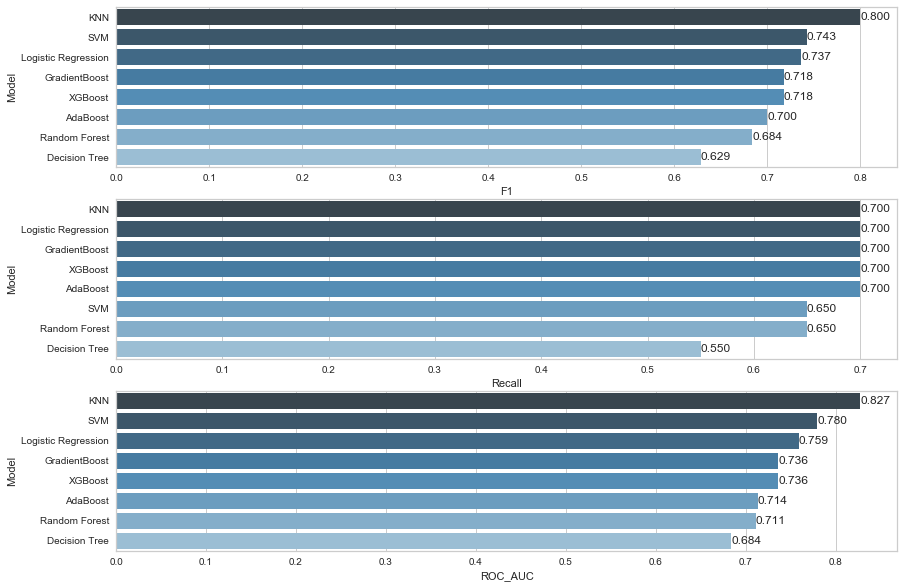

In [48]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [lreg_f1, knn_f1, svm_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [lreg_recall, knn_recall, svm_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [lreg_auc, knn_auc, svm_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

Result: The best 3 models are KNN, SVM and Logistic Regression.

## Use GridSearch Best 3 Model with Hyperparameters

In [78]:
print('KNN Grid Search \n')
from sklearn.model_selection import GridSearchCV
knn_grid = KNeighborsClassifier()
k_values = range(1, 10)
param_grid = {"n_neighbors": k_values, "weights": ["uniform", "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv= 10, scoring= "accuracy")
knn_grid_model.fit(x_train, y_train)
knn_grid_model.best_estimator_

# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=3')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

# NOW WITH K=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train,y_train)
y_train_pred = knn.predict(x_train)

print('WITH K=3-Pred')
print('\n')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print(classification_report(y_train, y_train_pred))

KNN Grid Search 

WITH K=3


[[21  1]
 [ 6 14]]


              precision    recall  f1-score   support

           0       0.78      0.95      0.86        22
           1       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42

WITH K=3-Pred


[[81  8]
 [13 64]]


              precision    recall  f1-score   support

           0       0.86      0.91      0.89        89
           1       0.89      0.83      0.86        77

    accuracy                           0.87       166
   macro avg       0.88      0.87      0.87       166
weighted avg       0.87      0.87      0.87       166



In [83]:
print('Logistic Regression Grid Search \n')
from sklearn.model_selection import GridSearchCV
lreg = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'], 'random_state':[42], 'C':[1, 10]}
lreg = GridSearchCV(LogisticRegression(), parameters, scoring='accuracy')
lreg.fit(x_train, y_train)


lreg.best_estimator_

lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

print('Log-Reg')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

lreg.fit(x_train,y_train)
y_train_pred = lreg.predict(x_train)

print('Log-Reg-Pred')
print('\n')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print(classification_report(y_train, y_train_pred))

Logistic Regression Grid Search 

Log-Reg


[[18  4]
 [ 6 14]]


              precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.78      0.70      0.74        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.76      0.76      0.76        42

Log-Reg-Pred


[[70 19]
 [21 56]]


              precision    recall  f1-score   support

           0       0.77      0.79      0.78        89
           1       0.75      0.73      0.74        77

    accuracy                           0.76       166
   macro avg       0.76      0.76      0.76       166
weighted avg       0.76      0.76      0.76       166



In [90]:
print('Support Vector Machine Grid Search \n')
from sklearn.model_selection import GridSearchCV
svm = SVC()
param_grid = {"C" : [0.001, 0.01, 1, 10, 100, 1000],
             "kernel": ["linear", "rbf", "sigmoid", "poly"],
             "gamma" : ["scale", "auto"],
             "degree": [1, 2, 3]}
svm = GridSearchCV(svm, param_grid)
svm.fit(x_train, y_train)


svm.best_estimator_

svm.fit(x_train,y_train)
pred = svm.predict(x_test)

print('SVM')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

svm.fit(x_train,y_train)
y_train_pred = svm.predict(x_train)

print('SVM-Pred')
print('\n')
print(confusion_matrix(y_train, y_train_pred))
print('\n')
print(classification_report(y_train, y_train_pred))

Support Vector Machine Grid Search 

SVM


[[20  2]
 [ 7 13]]


              precision    recall  f1-score   support

           0       0.74      0.91      0.82        22
           1       0.87      0.65      0.74        20

    accuracy                           0.79        42
   macro avg       0.80      0.78      0.78        42
weighted avg       0.80      0.79      0.78        42

SVM-Pred


[[79 10]
 [22 55]]


              precision    recall  f1-score   support

           0       0.78      0.89      0.83        89
           1       0.85      0.71      0.77        77

    accuracy                           0.81       166
   macro avg       0.81      0.80      0.80       166
weighted avg       0.81      0.81      0.81       166



# CONCLUSION

Based on the accuracy levels of different models after using grid search method, KNN proved to be the best model for this data.

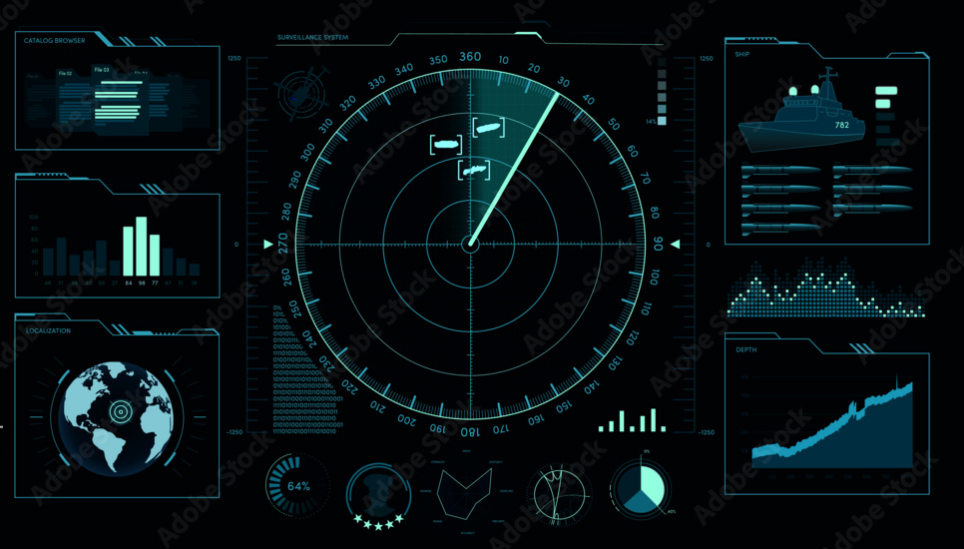